In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import seaborn as sns

In [3]:
df_22 = pd.read_csv('state_NY_22.csv')

C:\Users\nikod\AppData\Local\Temp\ipykernel_15028\2927935134.py:1: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df_22 = pd.read_csv('state_NY_22.csv')


In [5]:
df = df_22.drop(columns=[
'applicant_age_above_62','co-applicant_age_above_62',
    'aus-2', 'aus-3', 'aus-4', 'aus-5',
    'denial_reason-2', 'denial_reason-3','denial_reason-4', 
    'activity_year', 'total_points_and_fees','county_code',
    'lei', 'multifamily_affordable_units', 'prepayment_penalty_term', 'state_code',
    'applicant_race-1','applicant_race-2', 'applicant_race-3','applicant_race-4', 'applicant_race-5', 'co-applicant_race-2', 'co-applicant_race-3', 'co-applicant_race-4','co-applicant_race-5', 'co-applicant_race_observed', 'co-applicant_sex_observed', 'applicant_race_observed' ,'co-applicant_race-1', 'co-applicant_sex',
    'applicant_sex','applicant_sex_observed',
    'applicant_ethnicity-1','applicant_ethnicity-2','applicant_ethnicity-3', 'applicant_ethnicity-4','applicant_ethnicity-5','applicant_ethnicity_observed', 'co-applicant_ethnicity-1','co-applicant_ethnicity-2', 'co-applicant_ethnicity-3','co-applicant_ethnicity-4', 'co-applicant_ethnicity-5', 'co-applicant_ethnicity_observed', 
    'construction_method',
    'lien_status','loan_type',
    'ffiec_msa_md_median_family_income', 'derived_msa-md',
    'tract_one_to_four_family_homes', 'submission_of_application', 'occupancy_type', 'other_nonamortizing_features', 
    'derived_msa-md',
    'discount_points', 'lender_credits', 'intro_rate_period'
])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548905 entries, 0 to 548904
Data columns (total 43 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   census_tract                              545678 non-null  float64
 1   conforming_loan_limit                     542121 non-null  object 
 2   derived_loan_product_type                 548905 non-null  object 
 3   derived_dwelling_category                 548905 non-null  object 
 4   derived_ethnicity                         548905 non-null  object 
 5   derived_race                              548905 non-null  object 
 6   derived_sex                               548905 non-null  object 
 7   action_taken                              548905 non-null  int64  
 8   purchaser_type                            548905 non-null  int64  
 9   preapproval                               548905 non-null  int64  
 10  loan_purpose        

In [162]:
obj_columns = df.select_dtypes(include=['object'])
obj_columns

,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,loan_to_value_ratio,interest_rate,rate_spread,total_loan_costs,origination_charges,loan_term,property_value,total_units,debt_to_income_ratio,applicant_age,co-applicant_age
0,C,Conventional:First Lien,Single Family (1-4 Units):Manufactured,Not Hispanic or Latino,Native Hawaiian or Other Pacific Islander,Joint,NaN,NaN,NaN,NaN,NaN,300,125000.0,1,>60%,45-54,35-44
1,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,NaN,NaN,NaN,NaN,NaN,360,265000.0,1,NaN,8888,9999
2,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,NaN,NaN,NaN,NaN,NaN,360,NaN,1,NaN,8888,9999
3,U,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,NaN,NaN,NaN,NaN,NaN,360,NaN,4,NaN,8888,9999
4,U,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,NaN,NaN,NaN,NaN,NaN,360,1175000.0,1,NaN,8888,9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548900,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,NaN,6.75,NaN,NaN,NaN,360,275000.0,2,NaN,8888,9999
548901,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,NaN,NaN,NaN,NaN,NaN,360,NaN,4,NaN,8888,9999
548902,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,NaN,NaN,NaN,NaN,NaN,360,NaN,1,NaN,8888,9999
548903,NC,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,NaN,NaN,NaN,NaN,NaN,360,1435000.0,1,NaN,8888,9999


## Object features casting ##

In [21]:
num_columns = list(filter(lambda col: (df[col] == 'Exempt').any(), obj_columns))
cat_columns = list(filter(lambda col: not (df[col] == 'Exempt').any(), obj_columns))
num_columns, cat_columns

(['loan_to_value_ratio',
  'interest_rate',
  'rate_spread',
  'total_loan_costs',
  'origination_charges',
  'loan_term',
  'property_value',
  'debt_to_income_ratio'],
 ['conforming_loan_limit',
  'derived_loan_product_type',
  'derived_dwelling_category',
  'derived_ethnicity',
  'derived_race',
  'derived_sex',
  'total_units',
  'applicant_age',
  'co-applicant_age'])

In [150]:
df_no_exempt = df.replace({col: {'Exempt': np.nan} for col in num_columns})
df_no_exempt = df_no_exempt.replace(
{'debt_to_income_ratio': { #replacement with mean of interval
    '<20%': 0.1,
    '20%-<30%': 0.25,
    '30%-<36%': 0.33,
    '36': 0.36,
    '37': 0.37,
    '38': 0.38,
    '39': 0.39,
    '40': 0.40,
    '41': 0.41,
    '42': 0.42,
    '43': 0.43,
    '44': 0.44,
    '45': 0.45,
    '46': 0.46,
    '47': 0.47,
    '48': 0.48,
    '49': 0.49,
    '50%-60%': 0.55,
    '>60%': 0.8
},
 'total_loan_costs': {np.nan: 0.},
 'origination_charges': {np.nan: 0.}
}
)
df_no_exempt[num_columns] = df_no_exempt[num_columns].apply(pd.to_numeric)
df_no_exempt = df_no_exempt[df_no_exempt['denial_reason-1'] != 1111]
#todo: replace object categorical variables with int64 numbers (0,1..n)

In [125]:
df_no_exempt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 539194 entries, 0 to 548904
Data columns (total 42 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   census_tract                              536752 non-null  float64
 1   conforming_loan_limit                     533402 non-null  object 
 2   derived_loan_product_type                 539194 non-null  object 
 3   derived_dwelling_category                 539194 non-null  object 
 4   derived_ethnicity                         539194 non-null  object 
 5   derived_race                              539194 non-null  object 
 6   derived_sex                               539194 non-null  object 
 7   action_taken                              539194 non-null  int64  
 8   purchaser_type                            539194 non-null  int64  
 9   preapproval                               539194 non-null  int64  
 10  loan_purpose             

<Axes: >

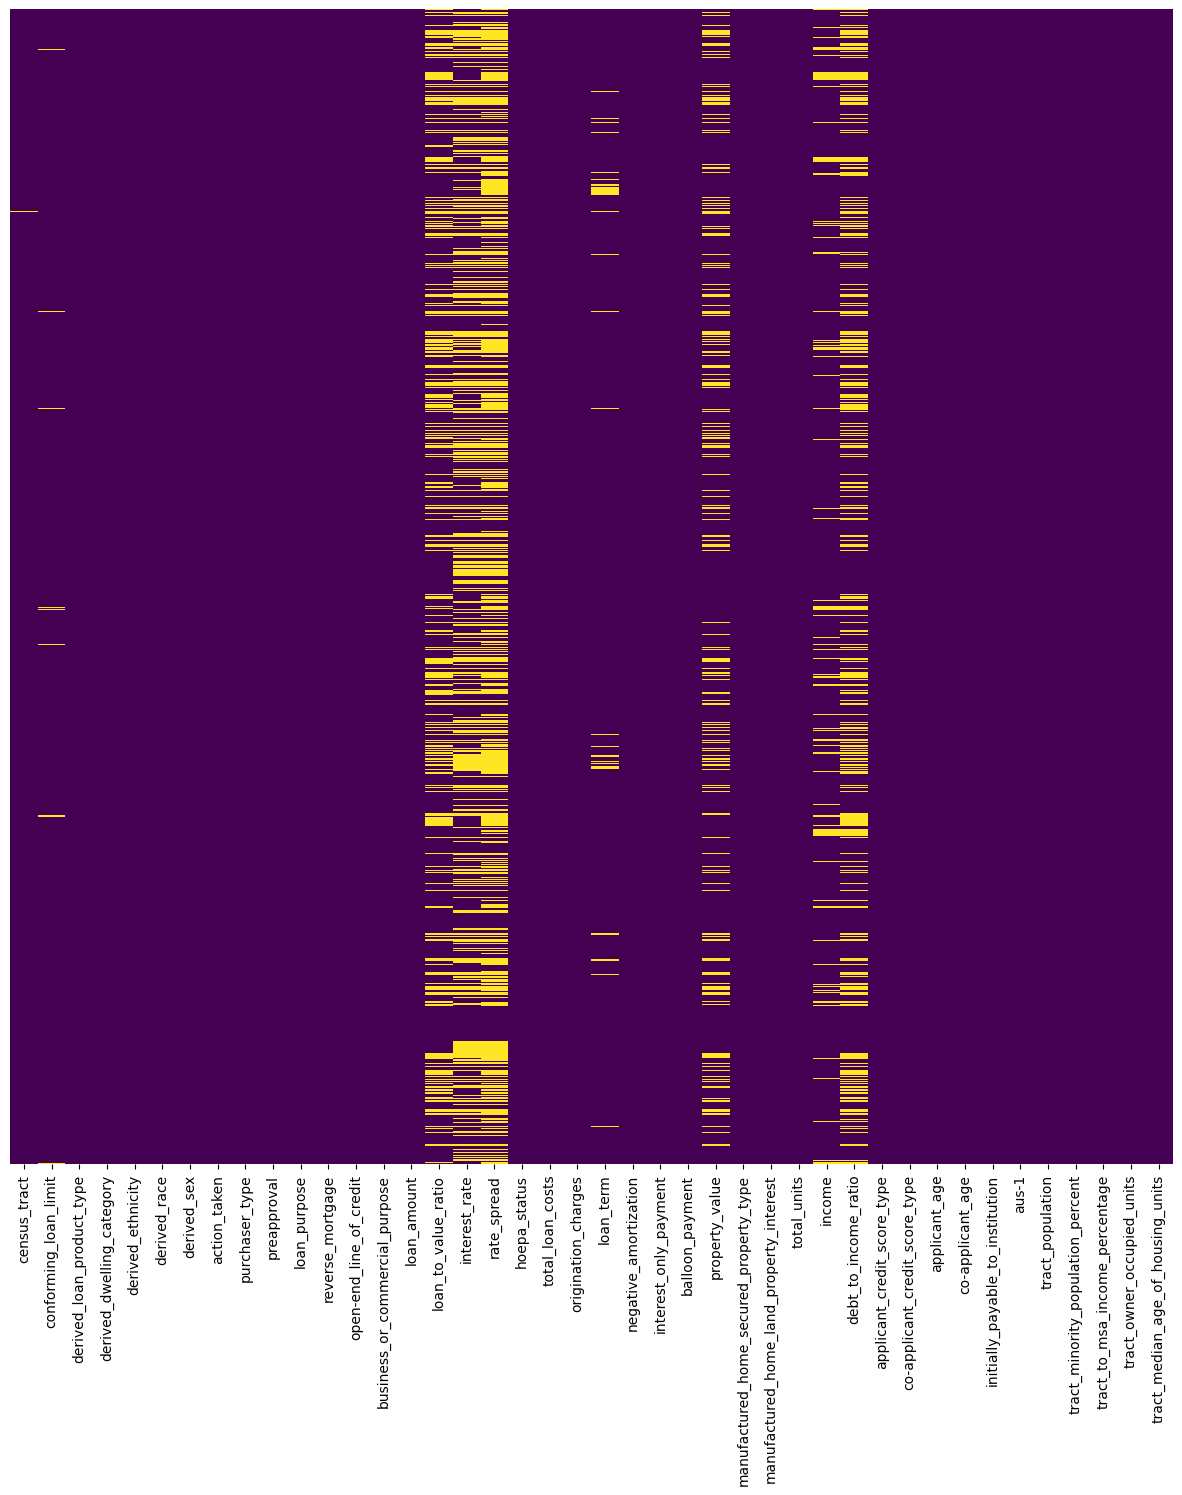

In [127]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_no_exempt.isnull(), yticklabels=False,cbar=False,cmap='viridis')

## Version 1, agregated classification ##

In [ ]:
#agregate denial_reason-1 to 2 classes 1 for 10, 0 for rest

## Train - test dataset split ##

In [ ]:
# TRAIN - TEST SPLIT
from sklearn.model_selection import StratifiedShuffleSplit # random state 0
#train 3:1 test - may change later

1. train - random undersampling of dominant class, reduce to 66%
2. train - random oversampling of minority class, double it

If after ENN and SMOTE classes will not be around equal, change this values and try again

# IMPORTANT!!! #
+ random_state=0 wherever possible
+ all gridsearches: cv=10, n_jobs=-1, scoring='roc_auc'
+ ... in params means name of component in pipeline, it is parameter to optimize for that component (see in pum notebook or docs)
+ if metrics are not improving, try different random over/under sampling 

## Missing values complementation standarization ##
BOTH TRAIN AND TEST, BUT SEPARATELY

#### What to do with missing values? ####
+ total_loan_costs - replace with 0 - done
+ origination_charges - replace with 0 - done
+ confirming_loan_limit - drop rows with nan
+ census_tract - drop rows with nan
+ loan_term - drop rows with nan
+ income - drop rows with nan
+ loan_to_value_ratio - mean
+ interest_rate - mean or linear regression
+ rate_spread - mean or linear regression
+ property_value - mean or linear regression
+ debt_to_income_ratio - mean or linear regression

In [167]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
# fill missing values simpleImpute (happy way - mean, no regression for now)
# one hot encodeing categorical features
# minmax standarization numerical features

In [175]:
from sklearn.ensemble import RandomForestClassifier
# to test performance, from pum notebook
def assess_rf_performance(estimator: RandomForestClassifier, X_test, y_test) -> None:
    y_score = estimator.predict_proba(X_test)[:, 1]
    y_pred = estimator.predict(X_test)
    auroc = roc_auc_score(y_test, y_score)
    f1 = f1_score(y_test, y_pred)

    print(f"AUROC: {100 * auroc:.2f}%")
    print(f"F1-score: {100 * f1:.2f}%")

In [176]:
# here train RFC before enn and smote to compare performance

## Undersampling ##
ONLY TRAIN SET
- ENN + hyperparameters tuning (gridsearch) on RandomForestClassifier(class_weight="balanced", random_state=0, n_jobs=-1)
- Pipeline with enn step before RFC

In [180]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.model_selection import GridSearchCV # always create new estimator!

param_grid = {"...__n_neighbors": [1, 3, 5], "...__kind_sel": ["all", "mode"]} # to optimize for RandomForestClassifier, experiment with different values

## Oversampling ##
ONLY TRAIN SET
- SMOTE + hyperparameters tuning (gridsearch) on RandomForestClassifier(class_weight="balanced", random_state=0, n_jobs=-1)
- Pipeline with smote step before RFC

In [170]:
from imblearn.over_sampling import SMOTE

param_grid = {"...__k_neighbors": [1, 2, 3, 4, 5]} # to optimize for RandomForestClassifier, experiment with different values

## Combined ##
try combined over & under sampling at once with optimal hyperparameters
- Pipeline with smoteenn step (with optimal parameters) before RFC

In [171]:
from imblearn.combine import SMOTEENN